In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from pathlib import Path
import pickle
import csv
import math

In [25]:
cmaps = ['Greys', 'Reds', 'Purples', 'Blues', 'Greens', 'Oranges', 'PuBu', 'YlOrRd']
bodyparts = ["nose_1", "head_1", "middle_body_1", "tailbase_1", "nose_2", "head_2", "middle_body_2", "tailbase_2"]

In [3]:
def load_csv(fp):
    with open(fp, 'r') as f:
        lines = f.readlines()
    return np.genfromtxt(lines, delimiter=',', names=True, skip_header=True)

In [4]:
def plot_traces(res, ph=33, pw=7, title=None, line_alpha=1.):
    fig, ax = plt.subplots(2, 8, figsize=(ph, pw))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
    if title:
        fig.suptitle(title)
        
    for n in range(8):
        x = [r[1+n*3] for r in res[1:]]
        y = [r[2+n*3] for r in res[1:]]

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        norm = plt.Normalize(0, 300)
        lc = LineCollection(segments, cmap=cmaps[n], norm=norm, alpha=line_alpha) #'viridis'
        lc.set_array(np.arange(0, 299))
        ax[0, n].add_collection(lc)

        ax[0, n].set_xlim(0, 700)
        ax[0, n].set_ylim(0, 700)
        ax[0, n].set_title(bodyparts[n])
        if(n):
            ax[0, n].set_xticks([])
            ax[0, n].set_yticks([])
        
        mx_speed = 250
        dp = np.sqrt(np.power(np.diff(x), 2) + np.power(np.diff(y), 2))
        points = np.array([np.arange(len(dp)), dp]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        norm = plt.Normalize(0, mx_speed)
        lc = LineCollection(segments, cmap='magma', norm=norm, alpha=line_alpha) #'viridis'
        lc.set_array(dp)
        
        ax[1, n].add_collection(lc)
        ax[1, n].set_ylim(0, mx_speed)
        ax[1, n].set_xlim(0, len(points))
        if(n):
            ax[1, n].set_xticks([])
            ax[1, n].set_yticks([])
    ax[0, 0].set_ylabel('Position')
    ax[1, 0].set_ylabel('Speed')
    ax[1, 0].set_xlabel('Time (s)')

In [5]:
def simple_plot(res):
    fig, ax = plt.subplots(1, 8, figsize=(20, 2.8))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)
    for n in range(8):
        x = [r[1+n*3] for r in res[1:]]
        y = [r[2+n*3] for r in res[1:]]
        ax[n].plot(x, y, color=f'C{n}')
        ax[n].set_xlim(0, 1800)
        ax[n].set_ylim(150, 620)
        if(n):
            ax[n].set_xticks([])
            ax[n].set_yticks([])

In [6]:
bp = Path('/home/melisa/Documents/social_interaction/')
bp.exists()

True

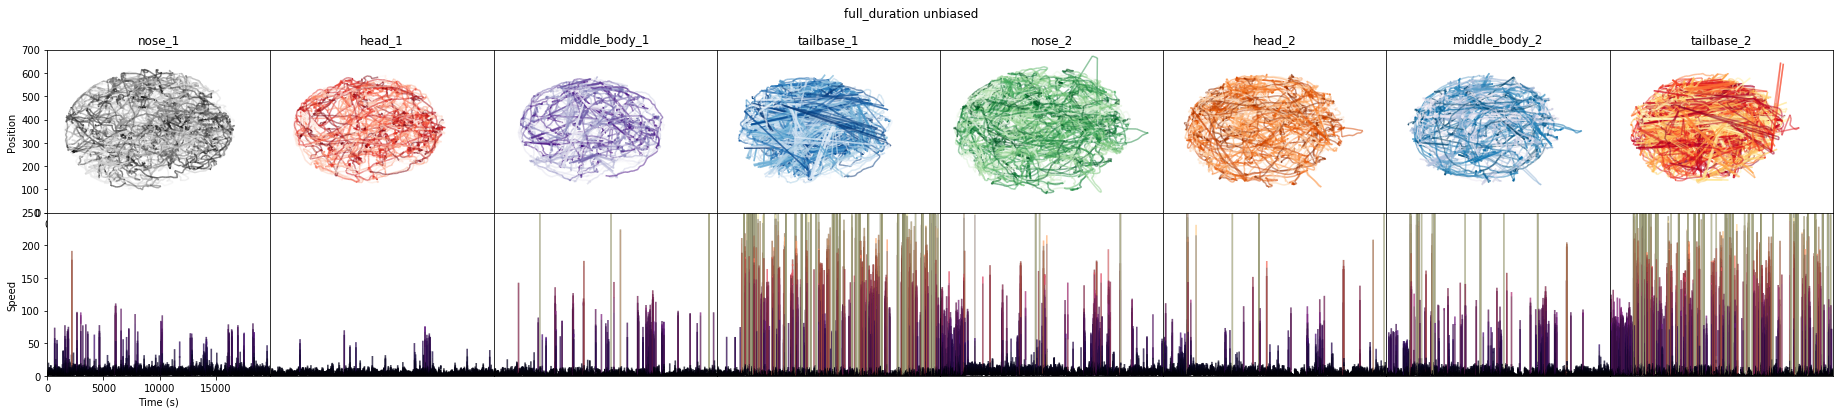

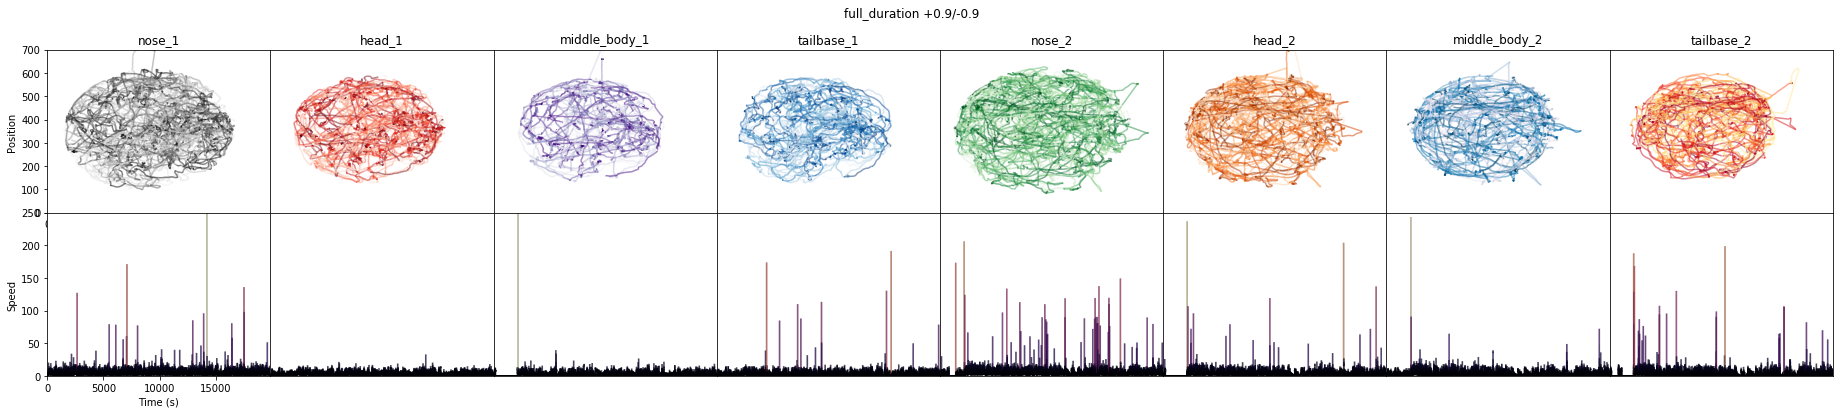

In [12]:
csp = bp / 'unbiased'
res1 = load_csv(list(csp.glob('*.csv'))[0])
plot_traces(res1, 32, 6, 'full_duration unbiased', line_alpha=0.5)

csp = bp / 'pos09_neg09'
res2 = load_csv(list(csp.glob('*.csv'))[0])
plot_traces(res2, 32, 6, 'full_duration +0.9/-0.9', line_alpha=0.5)

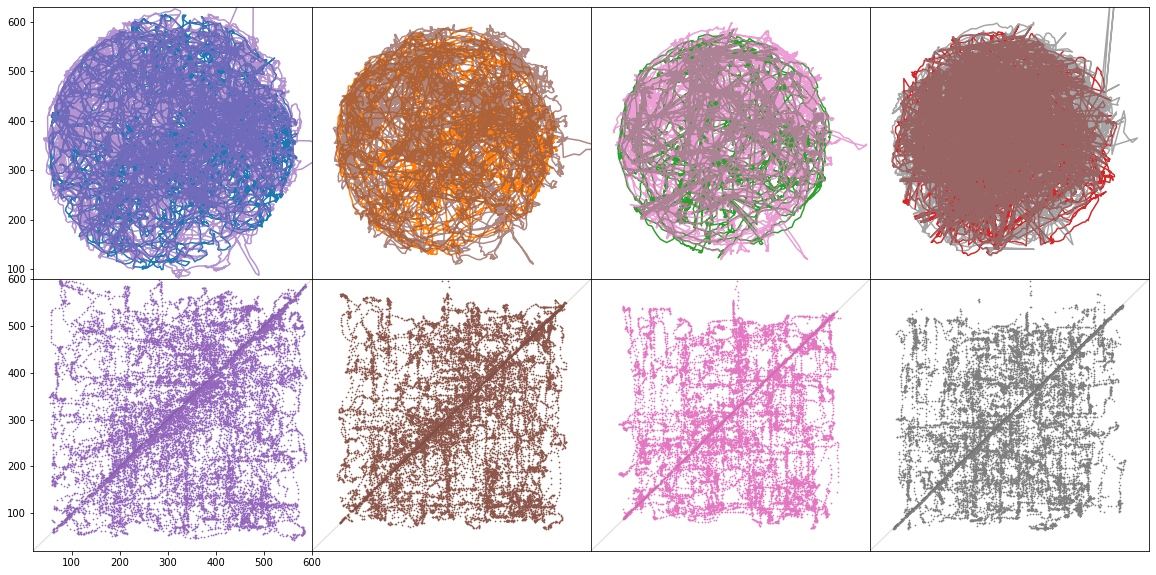

In [14]:
def offender_plot(res):
    fig, ax = plt.subplots(2, 4, figsize=(20, 10))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
    for n in range(4):
        x1 = [r[1+n*3] for r in res[1:]]
        y1 = [r[2+n*3] for r in res[1:]]
        ax[0, n].plot(x1, y1, color=f'C{n}')
        
        x2 = [r[1+(n+4)*3] for r in res[1:]]
        y2 = [r[2+(n+4)*3] for r in res[1:]]
        ax[0, n].plot(x2, y2, color=f'C{n+4}', alpha=0.7)
        
        ax[0, n].set_xlim(20, 620)
        ax[0, n].set_ylim(80, 630)
        if(n):
            ax[0, n].set_xticks([])
            ax[0, n].set_yticks([])
            
        diag = np.arange(700)
        ax[1, n].scatter(x1, x2, color=f'C{n+4}', s=0.5)
        ax[1, n].plot(diag, diag, color='k', alpha=0.1)
        ax[1, n].set_xlim(20, 600)
        ax[1, n].set_ylim(20, 600)
        if(n):
            ax[1, n].set_xticks([])
            ax[1, n].set_yticks([])
offender_plot(res1)

In [15]:
def count_swaps(res, threshold):
    
    n_swaps = np.zeros((8,1))
    for n in range(8):
        x = [r[1+n*3] for r in res[1:]]
        y = [r[2+n*3] for r in res[1:]]
        dp = np.sqrt(np.power(np.diff(x), 2) + np.power(np.diff(y), 2))
        swaps = np.where(dp > threshold)[0]
        n_swaps[n] = swaps.shape[0]
    return n_swaps

def signal_to_noise_ratio(res):
    ratio = np.zeros((8,1))
    for n in range(8):
        x = [r[1+n*3] for r in res[1:]]
        y = [r[2+n*3] for r in res[1:]]
        dp = np.sqrt(np.power(np.diff(x), 2) + np.power(np.diff(y), 2))
        dp_mean = np.mean(dp)
        dp_std = np.std(dp)
        ratio[n] = dp_mean/dp_std
    return ratio

In [19]:
swaps1 = count_swaps(res1,20)
swaps2 = count_swaps(res2,20)

In [24]:
print('Original swaps: ' + f'{np.sum(swaps1)/len(res1)}')
print('Bias swaps: ' + f'{np.sum(swaps2)/len(res2)}')

print('SNR original:' + f'{np.mean(signal_to_noise_ratio(res1))}')
print('SNR biased: '+ f'{np.mean(signal_to_noise_ratio(res2))}')

Original swaps: 0.22729788197414097
Bias swaps: 0.016602102933038185
SNR original:0.47711854871433546
SNR biased: 0.8547538563630549
